In [295]:

import pandas as pd
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Reading The Data In Python

In [7]:
CustomerD = pd.read_excel(
    '/Users/elyasmaghrabi/Documents/DT/DA Trendz Data Analytics Case Study - Data set.xlsx', 
    sheet_name='Customer Demographics',
    header=2)

In [9]:
TransctionInfo= pd.read_excel(
    '/Users/elyasmaghrabi/Documents/DT/DA Trendz Data Analytics Case Study - Data set.xlsx', 
    sheet_name='Transactional information',
    header=2)

In [11]:
loanR= pd.read_excel(
    '/Users/elyasmaghrabi/Documents/DT/DA Trendz Data Analytics Case Study - Data set.xlsx', 
    sheet_name='Loan Requests',
    header=2)

# Prints Information About a DataFrame

In [14]:
TransctionInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          3219 non-null   int64         
 1   Account Balance     3219 non-null   int64         
 2   Transaction Amount  3219 non-null   int64         
 3   Transaction Type    3219 non-null   object        
 4   Transaction Date    3219 non-null   datetime64[ns]
 5   Customer Feedback   3219 non-null   int64         
 6   Unnamed: 6          1 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 176.2+ KB


In [15]:
CustomerD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CustomerID             150 non-null    int64         
 1   Gender                 150 non-null    object        
 2   Date of Birth          150 non-null    int64         
 3   Location               150 non-null    object        
 4   Salary                 150 non-null    int64         
 5   Nationality            150 non-null    object        
 6   Account Creation Date  150 non-null    datetime64[ns]
 7   No. of Products        150 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 9.5+ KB


In [16]:
loanR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    648 non-null    int64         
 1   Loan Type     648 non-null    object        
 2   Loan Amount   648 non-null    int64         
 3   Request Date  648 non-null    datetime64[ns]
 4   Loan Status   648 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 25.4+ KB


In [20]:
del TransctionInfo['Unnamed: 6']


In [22]:
TransctionInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          3219 non-null   int64         
 1   Account Balance     3219 non-null   int64         
 2   Transaction Amount  3219 non-null   int64         
 3   Transaction Type    3219 non-null   object        
 4   Transaction Date    3219 non-null   datetime64[ns]
 5   Customer Feedback   3219 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 151.0+ KB


# Creating a SQLite Database

In [43]:
db_conn = sqlite3.connect("/Users/elyasmaghrabi/Documents/DT/DATrendz.db")

In [163]:
c = db_conn.cursor()

In [164]:
table_CustomerD="""CREATE TABLE IF NOT EXISTS CustomerDemographics
    (CustomerID INTEGER NOT NULL UNIQUE,
        Gender TEXT NOT NULL,
        DOB DATETIME,
        Location TEXT,
        Salary REAL,
        Nationality TEXT,
        Account_Creation_Date DATETIME,
         No_of_Products INTEGER,
        PRIMARY KEY(CustomerID));""" 


c.execute(table_CustomerD)
 
print("Table is Ready")
 
# Close the connection


Table is Ready


In [165]:
table_TI="""CREATE TABLE IF NOT EXISTS TransactionalInformation
    (CustomerID INTEGER ,
        Account_Balance REAL,
        Transaction_Amount REAL,
        Transaction_Type TEXT,
        Transaction_Date  DATETIME,
        Customer_Feedback INTEGER,
        FOREIGN KEY(CustomerID) REFERENCES CustomerDemographics(CustomerID));""" 


c.execute(table_TI)
 
print("Table is Ready")
 


Table is Ready


In [166]:
table_TI="""CREATE TABLE IF NOT EXISTS LoanRequests
    (CustomerID INTEGER ,
        Loan_Type  TEXT,
        Loan_Amount REAL,
        Request_Date  DATETIME,
         Loan_Status TEXT,
        FOREIGN KEY(CustomerID) REFERENCES CustomerDemographics(CustomerID));""" 


c.execute(table_TI)
 
print("Table is Ready")

Table is Ready


In [167]:
CustomerD = CustomerD.rename(columns={'Date of Birth': 'DOB', 'Account Creation Date': 'Account_Creation_Date', 'No. of Products': 'No_of_Products'})

In [168]:
TransctionInfo = TransctionInfo.rename(columns={'Account Balance': 'Account_Balance',
                                            'Transaction Amount': 'Transaction_Amount',
                                                'Transaction Type': 'Transaction_Type',
                                               'Transaction Date':'Transaction_Date',
                                                'Customer Feedback': 'Customer_Feedback'})

In [169]:
loanR = loanR.rename(columns={'Loan Type': 'Loan_Type', 'Loan Amount': 'Loan_Amount', 'Request Date': 'Request_Date',
                                               'Loan Status':'Loan_Status'})

In [170]:
CustomerD.to_sql('CustomerDemographics', db_conn, if_exists='append', index=False)


IntegrityError: UNIQUE constraint failed: CustomerDemographics.CustomerID

In [172]:
TransctionInfo.to_sql('TransactionalInformation', db_conn, if_exists='append', index=False)


3219

In [158]:
TransctionInfo

,CustomerID,Account_Balance,Transaction_Amount,Transaction_Type,Transaction_Date,Customer_Feedback
0,1001,8209,1625,Deposit,2023-01-01,2
1,1028,14876,1028,Transfer,2023-01-01,5
2,1042,11639,724,Deposit,2023-01-01,4
3,1046,18523,2716,Deposit,2023-01-01,1
4,1006,17498,-47,Transfer,2023-01-02,5
...,...,...,...,...,...,...
3214,1033,36318,1223,Transfer,2024-12-31,3
3215,1045,40352,4418,Deposit,2024-12-31,2
3216,1096,9553,-140,Withdrawal,2024-12-31,5
3217,1115,4904,-98,Transfer,2024-12-31,2


In [181]:
loanR.to_sql('LoanRequests', db_conn, if_exists='append', index=False)

648

# Average Account Balance Per Customer

In [177]:
pd.read_sql(
    "SELECT CustomerID ,  avg(Account_Balance) /COUNT(DISTINCT customerID)as avg_bal,MAX(Transaction_Date) AS MAXDATE FROM  TransactionalInformation GROUP BY customerID;", db_conn)

,CustomerID,avg_bal,MAXDATE
0,1001,17844.773585,2024-12-18 00:00:00
1,1002,15536.509434,2024-12-20 00:00:00
2,1003,22033.894737,2024-12-25 00:00:00
3,1004,17878.627119,2024-12-18 00:00:00
4,1005,23390.625000,2024-12-29 00:00:00
...,...,...,...
122,1146,8305.000000,2023-10-22 00:00:00
123,1147,18606.000000,2023-07-06 00:00:00
124,1148,12396.000000,2024-06-22 00:00:00
125,1149,5969.000000,2024-05-15 00:00:00


# top 10 customers with the highest number of transactions

In [178]:
pd.read_sql(
    "SELECT CustomerID , count(CustomerID) as highest_transactions FROM  TransactionalInformation WHERE Transaction_Date <  '2024-01-01' GROUP by CustomerID ORDER by  highest_transactions DESC  LIMIT 10;", db_conn)

,CustomerID,highest_transactions
0,1043,44
1,1042,41
2,1005,40
3,1047,39
4,1045,38
5,1044,38
6,1007,38
7,1011,37
8,1008,37
9,1050,35


In [185]:
pd.read_sql(
    "SELECT Loan_Status,  count(*)/(SELECT count(*)  FROM  LoanRequests  )FROM  LoanRequests WHERE Loan_Status= 'Rejected' ;", db_conn)

,Loan_Status,count(*)/(SELECT count(*) FROM LoanRequests )
0,Rejected,0


Already Have been uploaded data in database

# Fetch All Data To Start EDA Part


In [560]:
conn = sqlite3.connect('DATrendz.db')
df_cd = pd.read_sql_query("SELECT * from CustomerDemographics", conn)

In [561]:
df_cd.head()

,CustomerID,Gender,DOB,Location,Salary,Nationality,Account_Creation_Date,No_of_Products
0,1001,F,1979,Abha,33000.0,Pakistani,2024-01-30 00:00:00,4
1,1002,M,1990,Khobar,6000.0,Pakistani,2021-09-07 00:00:00,2
2,1003,F,1995,Riyadh,30000.0,Pakistani,2014-01-23 00:00:00,4
3,1004,F,1982,Abha,15000.0,Egyptian,2015-03-07 00:00:00,4
4,1005,M,1993,Medina,32000.0,Jordanian,2015-01-12 00:00:00,4


In [205]:
conn = sqlite3.connect('DATrendz.db')
df_ti = pd.read_sql_query("SELECT * from TransactionalInformation", conn)

In [206]:
df_ti.head()

,CustomerID,Account_Balance,Transaction_Amount,Transaction_Type,Transaction_Date,Customer_Feedback
0,1001,8209.0,1625.0,Deposit,2023-01-01 00:00:00,2
1,1028,14876.0,1028.0,Transfer,2023-01-01 00:00:00,5
2,1042,11639.0,724.0,Deposit,2023-01-01 00:00:00,4
3,1046,18523.0,2716.0,Deposit,2023-01-01 00:00:00,1
4,1006,17498.0,-47.0,Transfer,2023-01-02 00:00:00,5


In [207]:
conn = sqlite3.connect('DATrendz.db')
df_lr = pd.read_sql_query("SELECT * from LoanRequests", conn)

In [208]:
df_lr.head()

,CustomerID,Loan_Type,Loan_Amount,Request_Date,Loan_Status
0,1027,Personal Loans,34403.0,2023-01-01 00:00:00,Approved
1,1149,Auto Loans,47370.0,2023-01-01 00:00:00,Rejected
2,1144,Auto Loans,96641.0,2023-01-04 00:00:00,Approved
3,1008,Mortgage Loans,324395.0,2023-01-04 00:00:00,Approved
4,1035,Business Loans,603659.0,2023-01-06 00:00:00,Approved


In [209]:
df_cd.shape

(150, 8)

In [210]:
df_ti.shape

(3219, 6)

In [211]:
df_lr.shape

(648, 5)

In [212]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             150 non-null    int64  
 1   Gender                 150 non-null    object 
 2   DOB                    150 non-null    int64  
 3   Location               150 non-null    object 
 4   Salary                 150 non-null    float64
 5   Nationality            150 non-null    object 
 6   Account_Creation_Date  150 non-null    object 
 7   No_of_Products         150 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 9.5+ KB


In [213]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          3219 non-null   int64  
 1   Account_Balance     3219 non-null   float64
 2   Transaction_Amount  3219 non-null   float64
 3   Transaction_Type    3219 non-null   object 
 4   Transaction_Date    3219 non-null   object 
 5   Customer_Feedback   3219 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 151.0+ KB


In [214]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    648 non-null    int64  
 1   Loan_Type     648 non-null    object 
 2   Loan_Amount   648 non-null    float64
 3   Request_Date  648 non-null    object 
 4   Loan_Status   648 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 25.4+ KB


In [215]:
df_cd.describe() 

,CustomerID,DOB,Salary,No_of_Products
count,150.000000,150.000000,150.000000,150.000000
mean,1075.500000,1978.273333,17658.946667,3.433333
std,43.445368,12.882482,7828.636330,1.430336
min,1001.000000,1954.000000,5228.000000,1.000000
25%,1038.250000,1968.000000,10365.750000,3.000000
50%,1075.500000,1979.500000,17976.500000,3.000000
75%,1112.750000,1990.000000,24065.500000,4.000000
max,1150.000000,1998.000000,34000.000000,6.000000


In [216]:
df_ti.describe() 

,CustomerID,Account_Balance,Transaction_Amount,Customer_Feedback
count,3219.000000,3219.000000,3219.000000,3219.000000
mean,1031.374651,18329.688723,144.846536,2.983535
std,24.881660,13208.983625,2272.236174,1.409606
min,1001.000000,-14975.000000,-4994.000000,1.000000
25%,1014.000000,10490.500000,-781.000000,2.000000
50%,1028.000000,16373.000000,177.000000,3.000000
75%,1042.000000,24459.000000,1340.000000,4.000000
max,1150.000000,76704.000000,5000.000000,5.000000


In [283]:
df_lr.describe() 

,CustomerID,Loan_Amount
count,648.000000,648.000000
mean,1043.317901,200436.307099
std,39.211481,242407.495107
min,1001.000000,20368.000000
25%,1015.000000,49231.750000
50%,1032.000000,81804.500000
75%,1048.000000,276752.750000
max,1150.000000,993468.000000


# From the statiacis summary, we can infer the below findings:
The customers who are BOD in 1954 lowest salary and customers who is DOB in 1998 they have highest salary. 
The main thing that average salary is around 17k.
when it comes to transaction we can notice that the Account Balance with nigitve which can there are number of customer who take overdraft also they some effect on feedback.

In [219]:
df_cd.isnull().sum() 

CustomerID               0
Gender                   0
DOB                      0
Location                 0
Salary                   0
Nationality              0
Account_Creation_Date    0
No_of_Products           0
dtype: int64

In [220]:
df_ti.isnull().sum() 

CustomerID            0
Account_Balance       0
Transaction_Amount    0
Transaction_Type      0
Transaction_Date      0
Customer_Feedback     0
dtype: int64

In [221]:
df_lr.isnull().sum() 

CustomerID      0
Loan_Type       0
Loan_Amount     0
Request_Date    0
Loan_Status     0
dtype: int64

# Befor we do EDA, lets sprarte Numerical and categorical variables to be easy analysis

In [289]:
cat_cols_cd=df_cd.select_dtypes(include=['object']).columns
num_cols_cd=df_cd.select_dtypes(include=np.number).columns.tolist()
print('categorical value')
print(cat_cols_cd)
print('Numerical value')
print(num_cols_cd)

categorical value
Index(['Gender', 'Location', 'Nationality', 'Account_Creation_Date'], dtype='object')
Numerical value
['CustomerID', 'DOB', 'Salary', 'No_of_Products']


In [291]:
cat_cols_ti=df_ti.select_dtypes(include=['object']).columns
num_cols_ti=df_ti.select_dtypes(include=np.number).columns.tolist()
print('categorical value')
print(cat_cols_ti)
print('Numerical value')
print(num_cols_ti)

categorical value
Index(['Transaction_Type', 'Transaction_Date'], dtype='object')
Numerical value
['CustomerID', 'Account_Balance', 'Transaction_Amount', 'Customer_Feedback']


In [292]:
cat_cols_lr=df_lr.select_dtypes(include=['object']).columns
num_cols_lr=df_lr.select_dtypes(include=np.number).columns.tolist()
print('categorical value')
print(cat_cols_lr)
print('Numerical value')
print(num_cols_lr)

categorical value
Index(['Loan_Type', 'Request_Date', 'Loan_Status'], dtype='object')
Numerical value
['CustomerID', 'Loan_Amount']


CustomerID
skew : 0.0


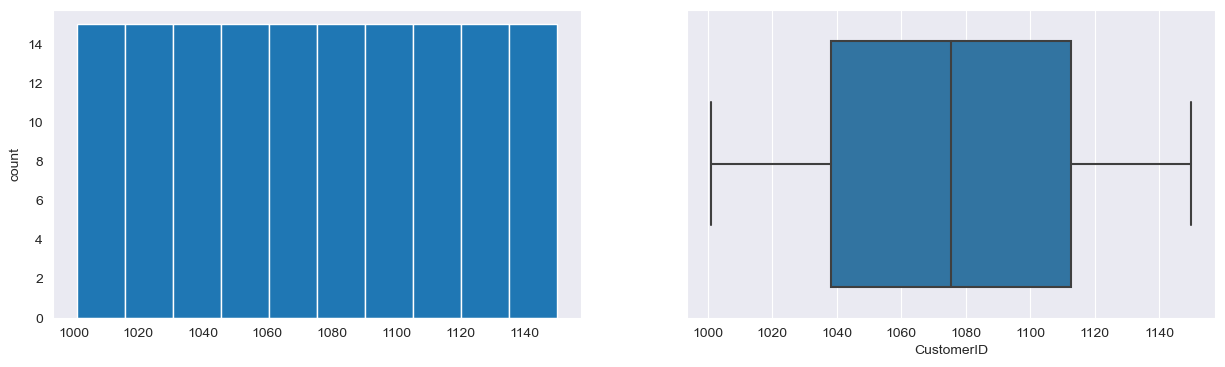

DOB
skew : -0.32


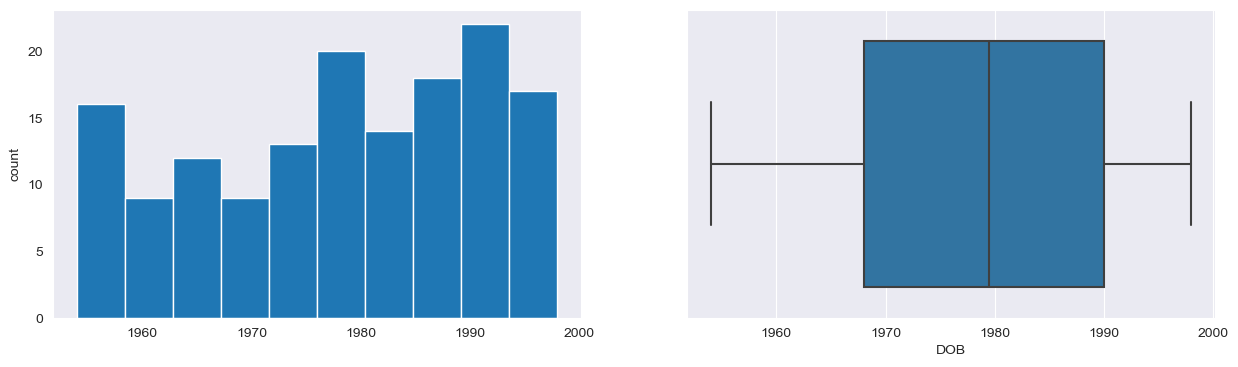

Salary
skew : 0.06


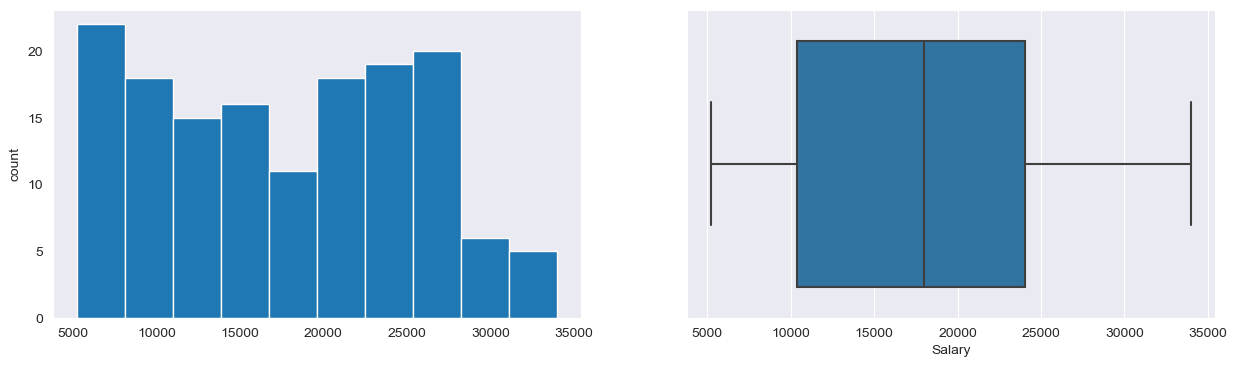

No_of_Products
skew : 0.02


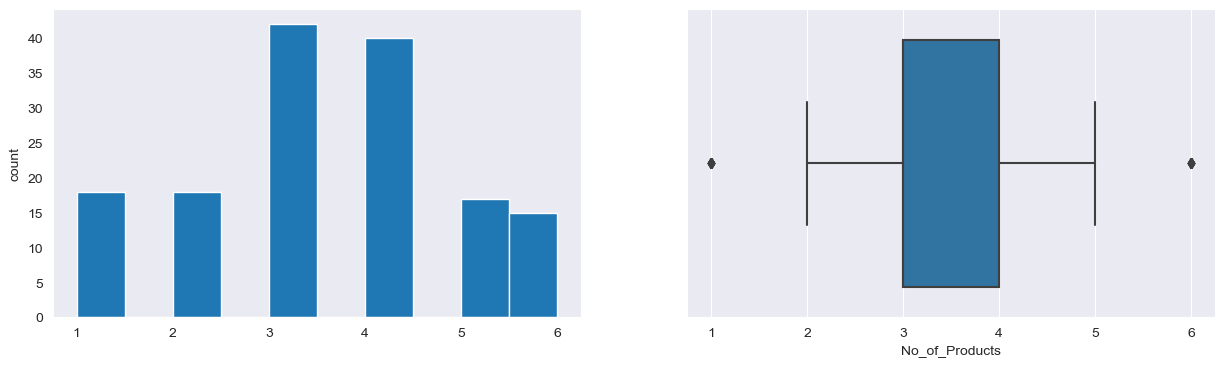

In [301]:
for col in num_cols_cd:
    print(col)
    print('skew :', round(df_cd[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_cd[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_cd[col])
    plt.show()

CustomerID
skew : 2.04


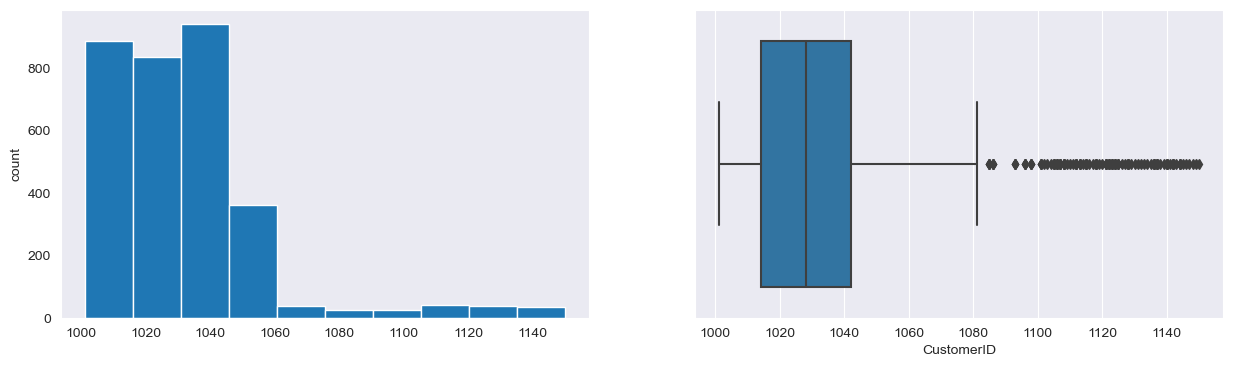

Account_Balance
skew : 0.97


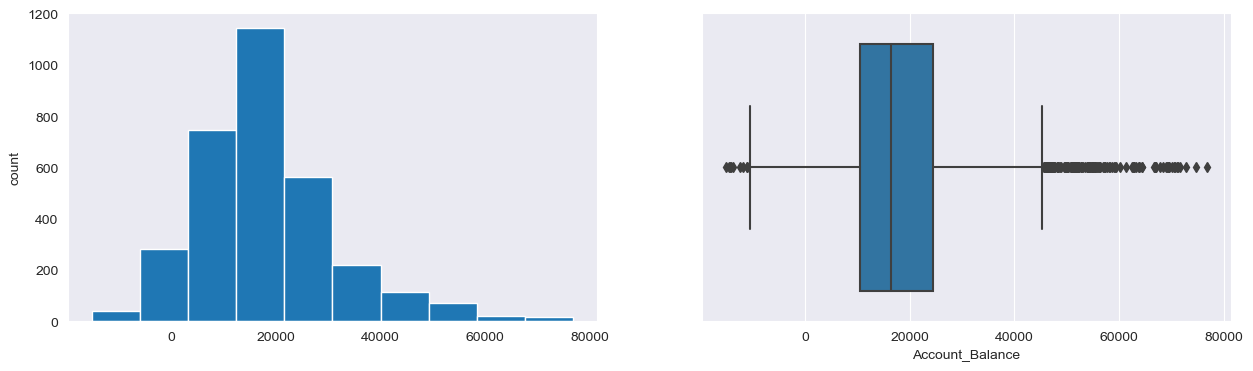

Transaction_Amount
skew : -0.16


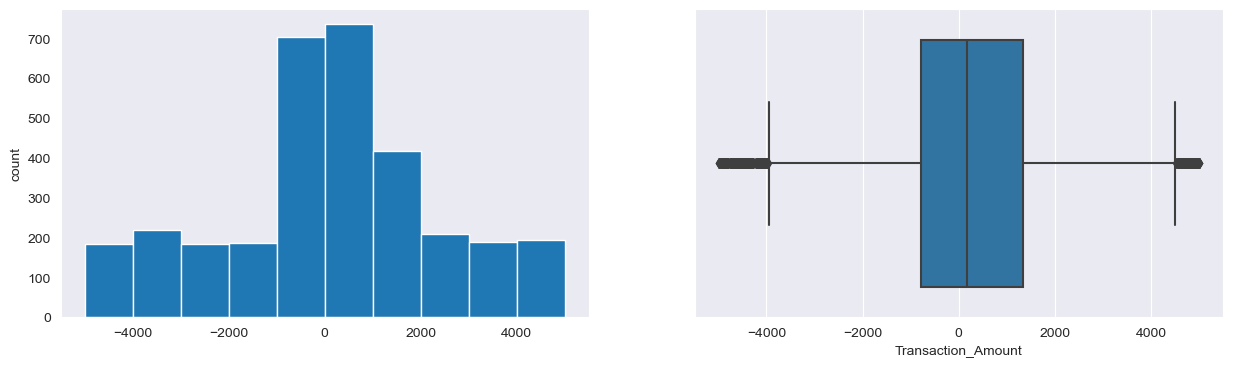

Customer_Feedback
skew : 0.02


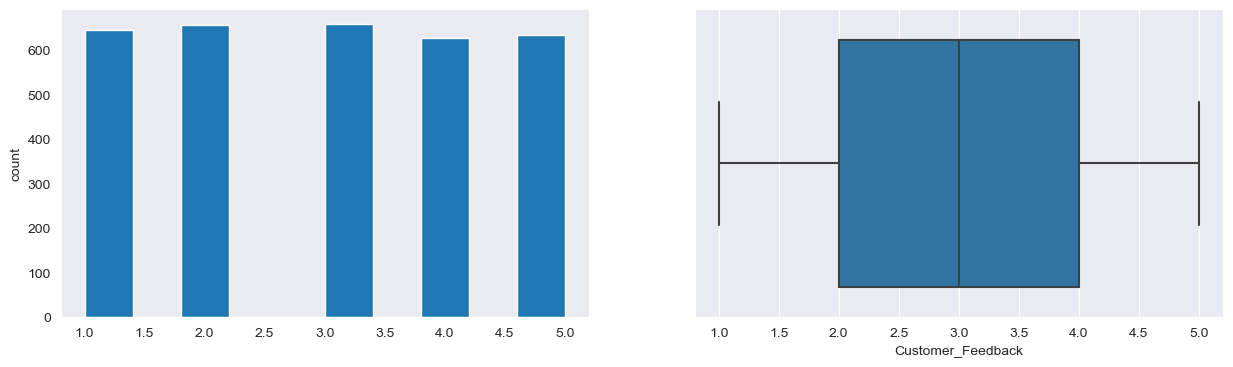

In [302]:
for col in num_cols_ti:
    print(col)
    print('skew :', round(df_ti[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_ti[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_ti[col])
    plt.show()

CustomerID
skew : 1.33


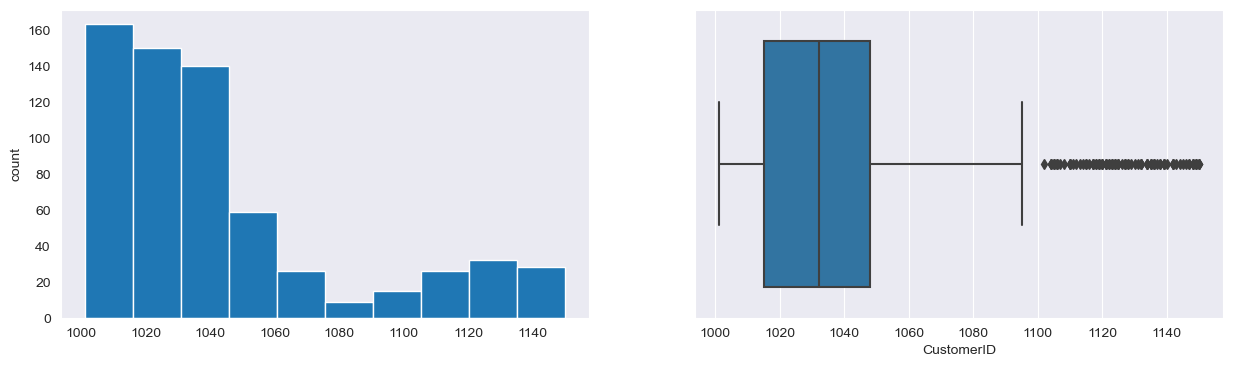

Loan_Amount
skew : 1.74


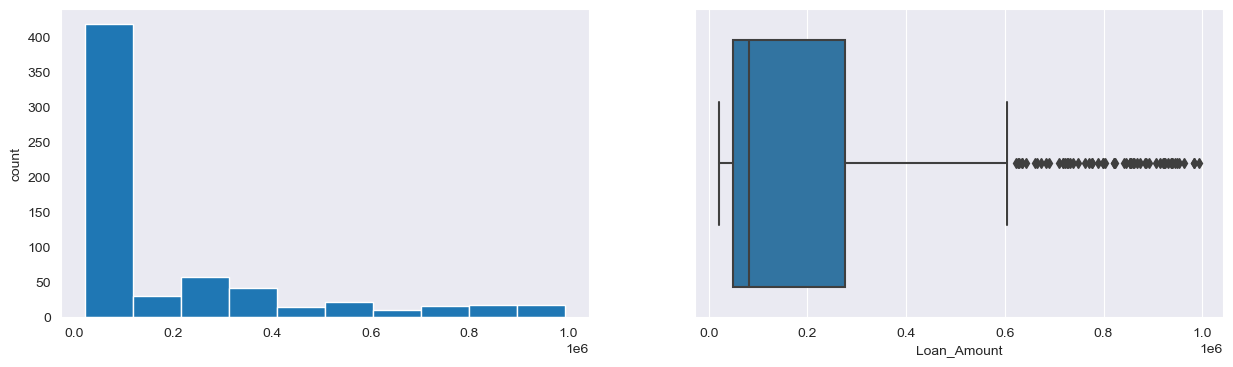

In [305]:
for col in num_cols_lr:
    print(col)
    print('skew :', round(df_lr[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_lr[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_lr[col])
    plt.show()

In [364]:
bins = [1954, 1960, 1965, 1970, 1975,1980,1985,1990,1995,1998]
df_cd['Gruop_Year'] = pd.cut(df_cd['DOB'], bins)

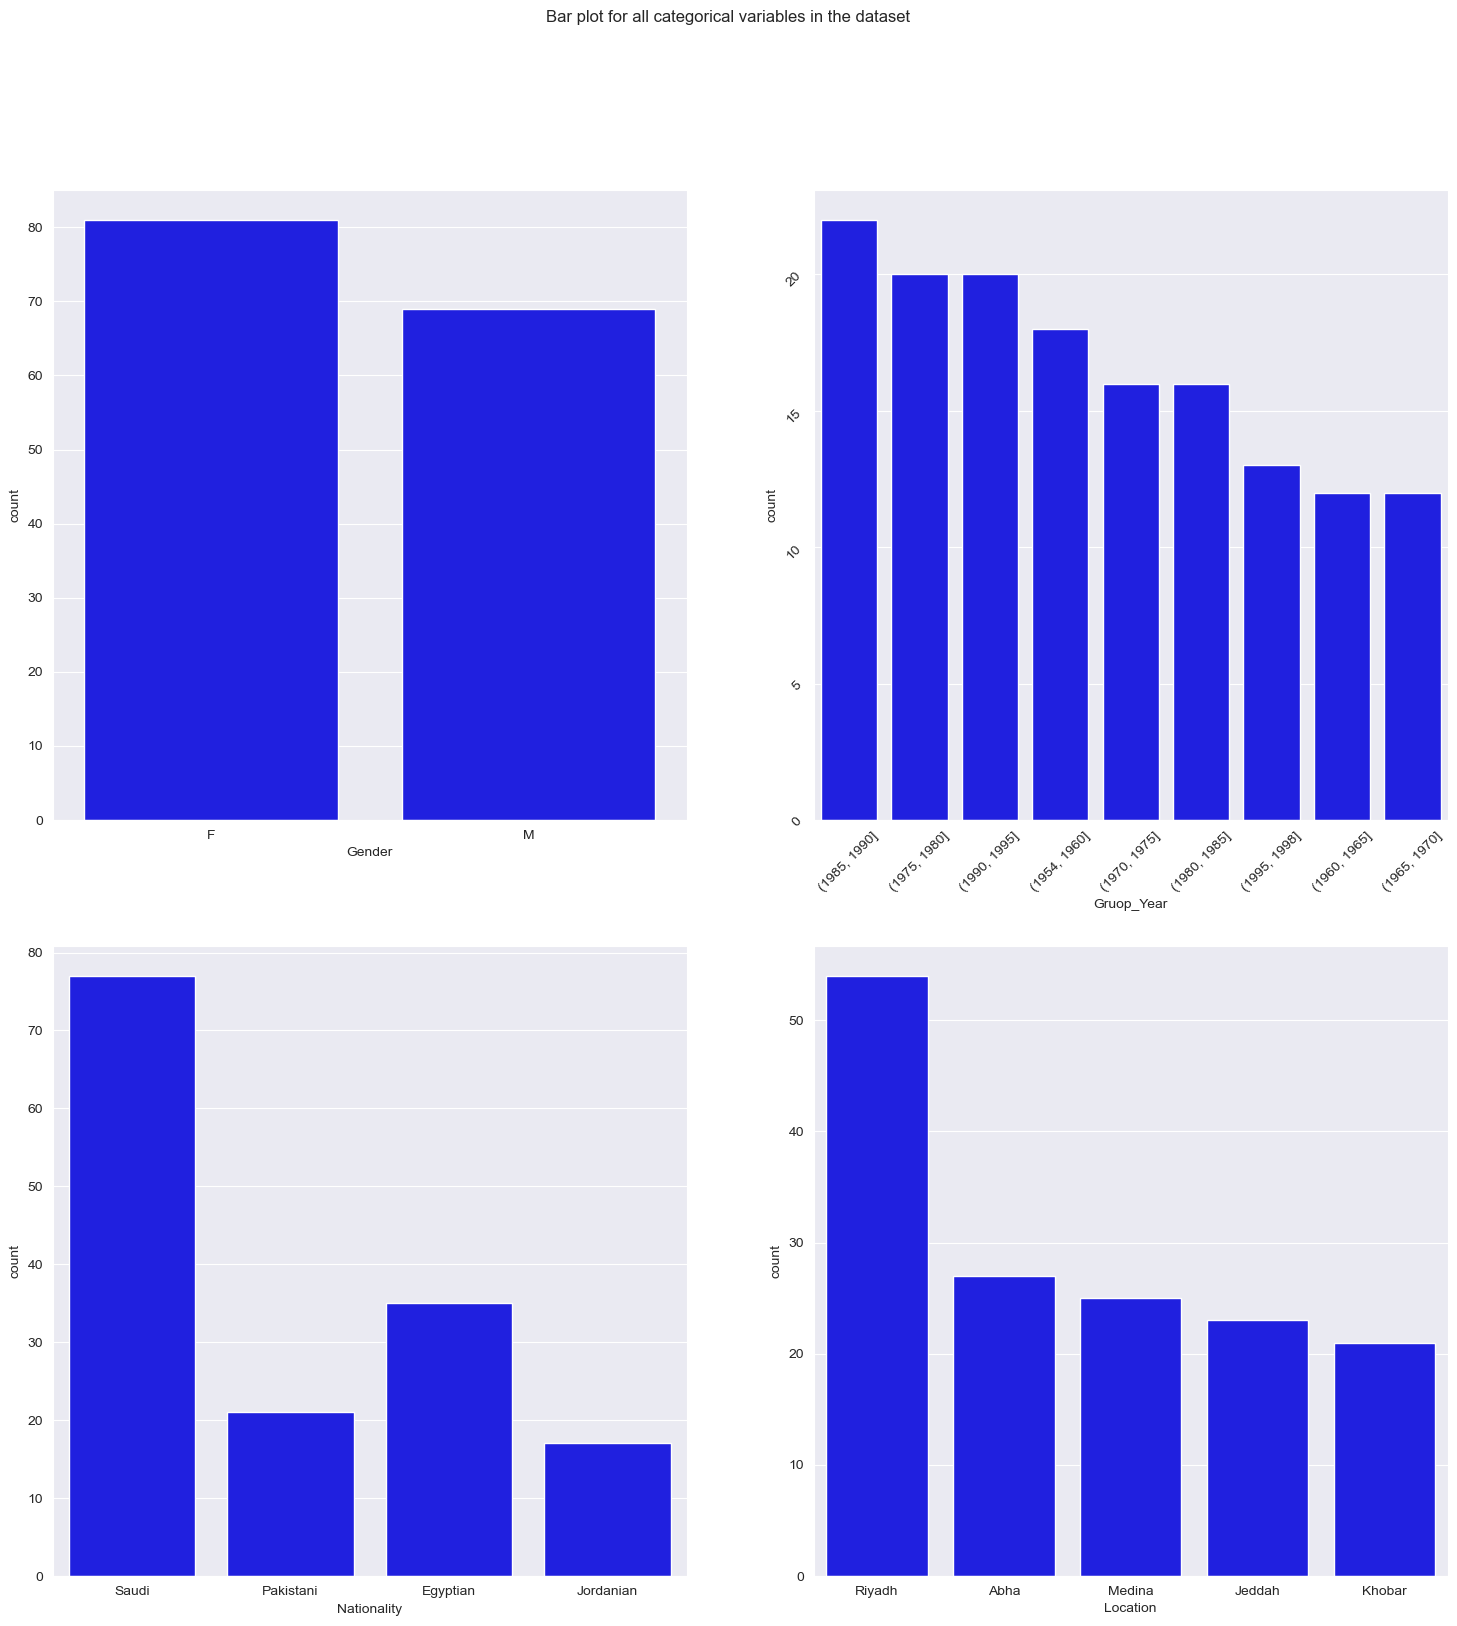

In [369]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Gender', data = df_cd, color = 'blue', 
              order = df_cd['Gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Gruop_Year', data = df_cd, color = 'blue', 
              order = df_cd['Gruop_Year'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = df_cd, color = 'blue', 
              order = df_cd['Location'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Nationality', data = df_cd, color = 'blue', 
              order = df_cd['Nationality'].head(20).value_counts().index);


axes[1][0].tick_params(labelrotation=0);
axes[0][1].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=0);

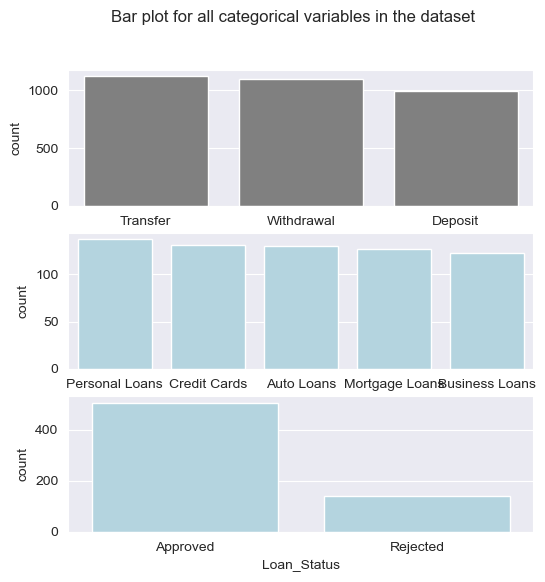

In [417]:
fig, axes = plt.subplots(3, 1, figsize = (6, 6))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'Transaction_Type', data = df_ti, color = 'Gray', 
              order = df_ti['Transaction_Type'].value_counts().index);
sns.countplot(ax = axes[1], x = 'Loan_Type', data = df_lr, color = 'lightblue', 
              order = df_lr['Loan_Type'].value_counts().index);
sns.countplot(ax = axes[2], x = 'Loan_Status', data = df_lr, color = 'lightblue', 
              order = df_lr['Loan_Status'].value_counts().index);

axes[0].tick_params(labelrotation=0);
axes[1].tick_params(labelrotation=0);


In [429]:
df_ti1 = df_ti.groupby('Transaction_Type').count()
print("Get count of the grouped data:\n", df_ti1['Transaction_Amount'])

Get sum of the grouped data:
 Transaction_Type
Deposit        994
Transfer      1122
Withdrawal    1103
Name: Transaction_Amount, dtype: int64


In [433]:
df_lr1 = df_lr.groupby('Loan_Status').count()
print("Get count of the grouped data:\n", df_lr1['CustomerID'])

Get sum of the grouped data:
 Loan_Status
Approved    507
Rejected    141
Name: CustomerID, dtype: int64


# From the count plot, we can have above observaions:
-Our base customers most of them Female belong to year of birth group [1985-1990], also when it comes to area riyadh are lead and most of the saudi.

-Main point here that we have high number of transfer and withdrawal represented by 35% for transfers and for withdrawal represented by 34% from total transactions.

-Their high requests of products as it shown in figure 78% are approved requests and the remaining are rejected.    

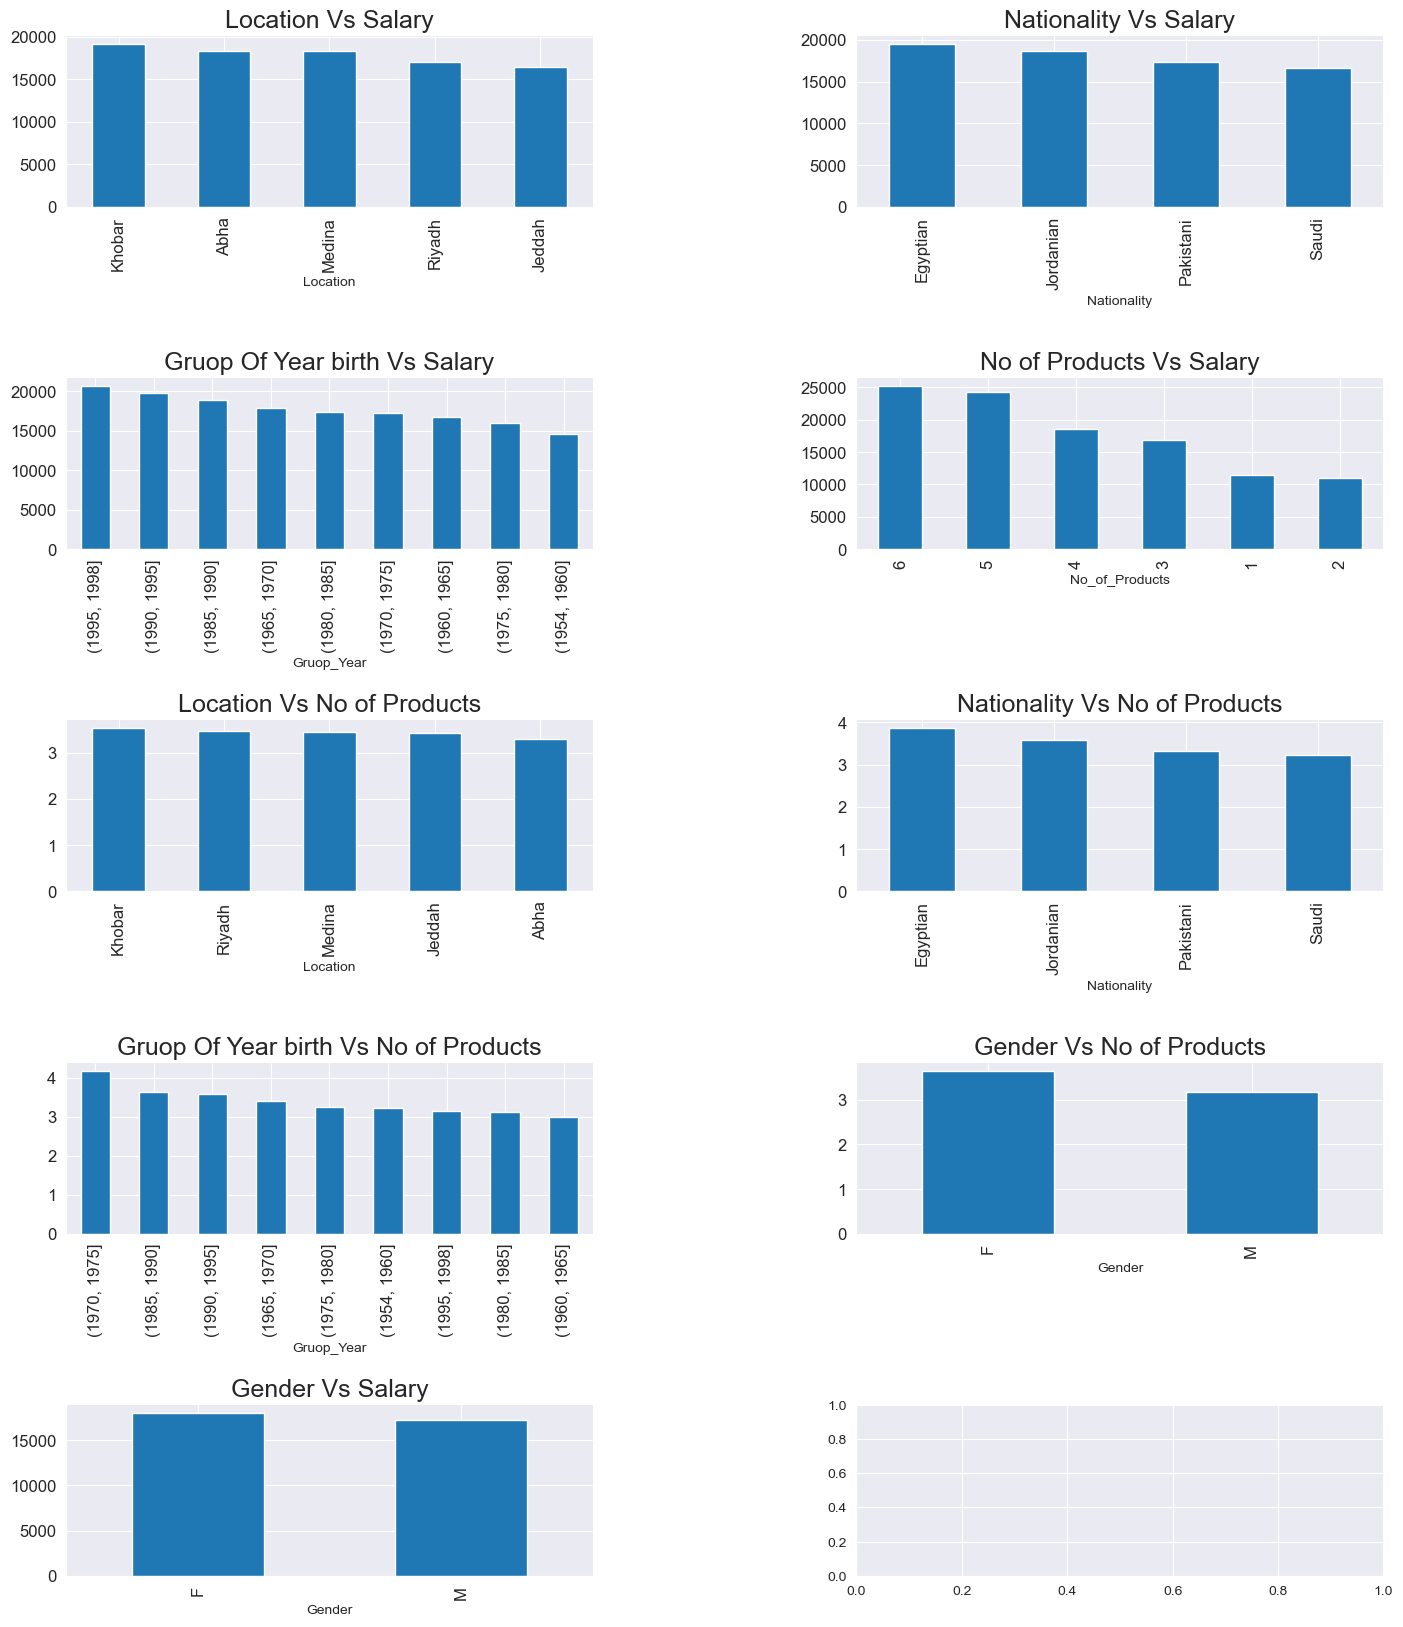

In [480]:
fig, axarr = plt.subplots(5, 2, figsize=(17, 20))
df_cd.groupby('Location')['Salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Salary", fontsize=18)

df_cd.groupby('Nationality')['Salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Nationality Vs Salary", fontsize=18)


df_cd.groupby('Gender')['Salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[4][0], fontsize=12)
axarr[4][0].set_title("Gender Vs Salary", fontsize=18)

df_cd.groupby('Gruop_Year')['Salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Gruop Of Year birth Vs Salary", fontsize=18)

df_cd.groupby('No_of_Products')['Salary'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("No of Products Vs Salary", fontsize=18)

df_cd.groupby('Location')['No_of_Products'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Location Vs No of Products", fontsize=18)

df_cd.groupby('Nationality')['No_of_Products'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Nationality Vs No of Products", fontsize=18)

df_cd.groupby('Gruop_Year')['No_of_Products'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Gruop Of Year birth Vs No of Products", fontsize=18)

df_cd.groupby('Gender')['No_of_Products'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Gender Vs No of Products", fontsize=18)


plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

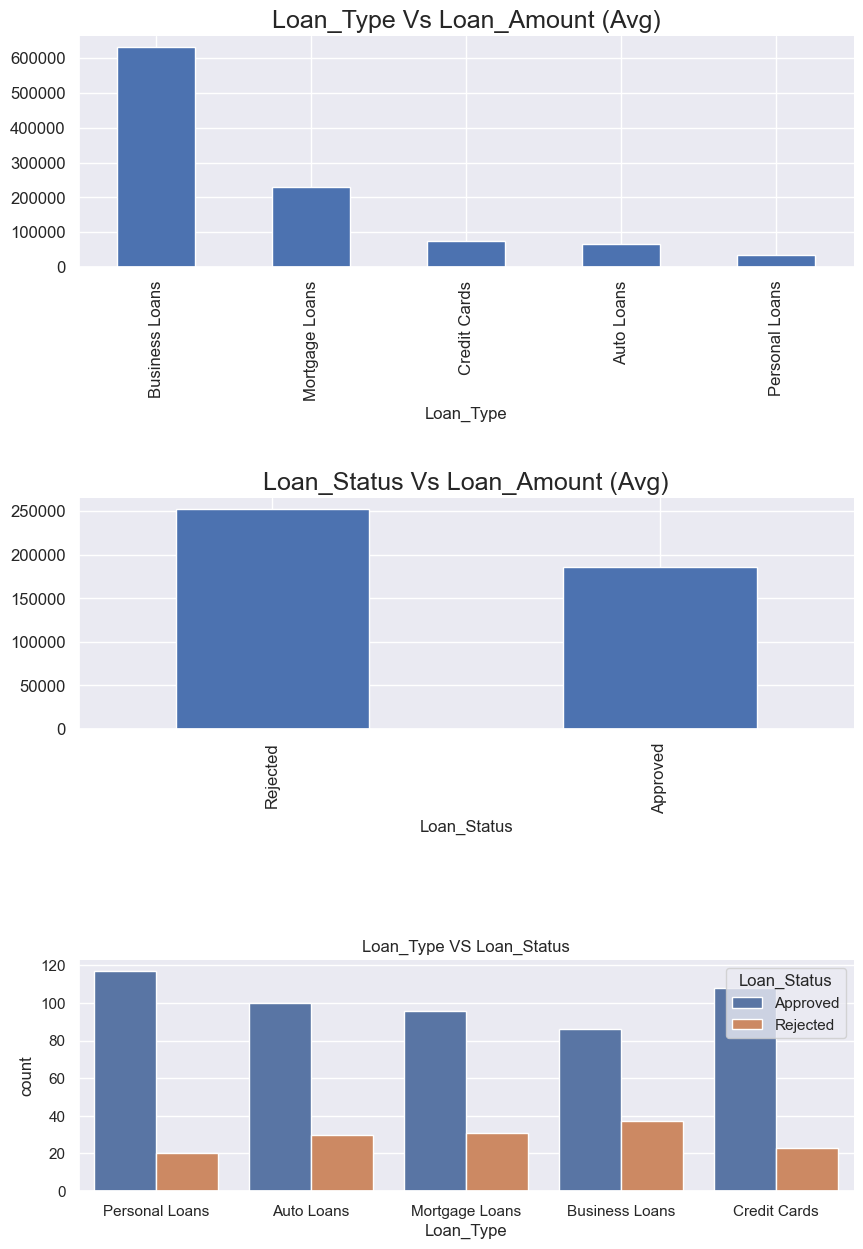

In [533]:
fig, axarr = plt.subplots(3,1, figsize=(10, 15))
df_lr.groupby('Loan_Type')['Loan_Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=12)
axarr[0].set_title("Loan_Type Vs Loan_Amount (Avg)", fontsize=18)


df_lr.groupby('Loan_Status')['Loan_Amount'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=12)
axarr[1].set_title("Loan_Status Vs Loan_Amount (Avg)", fontsize=18)

sns.countplot(x='Loan_Type',hue='Loan_Status',data=df_lr)
sns.set(rc={'figure.figsize':(15,20)})
plt.title("Loan_Type VS Loan_Status")


plt.subplots_adjust(hspace=1)
plt.subplots_adjust(wspace=1)
sns.despine()

Text(0.5, 1.0, 'Location VS Nationality')

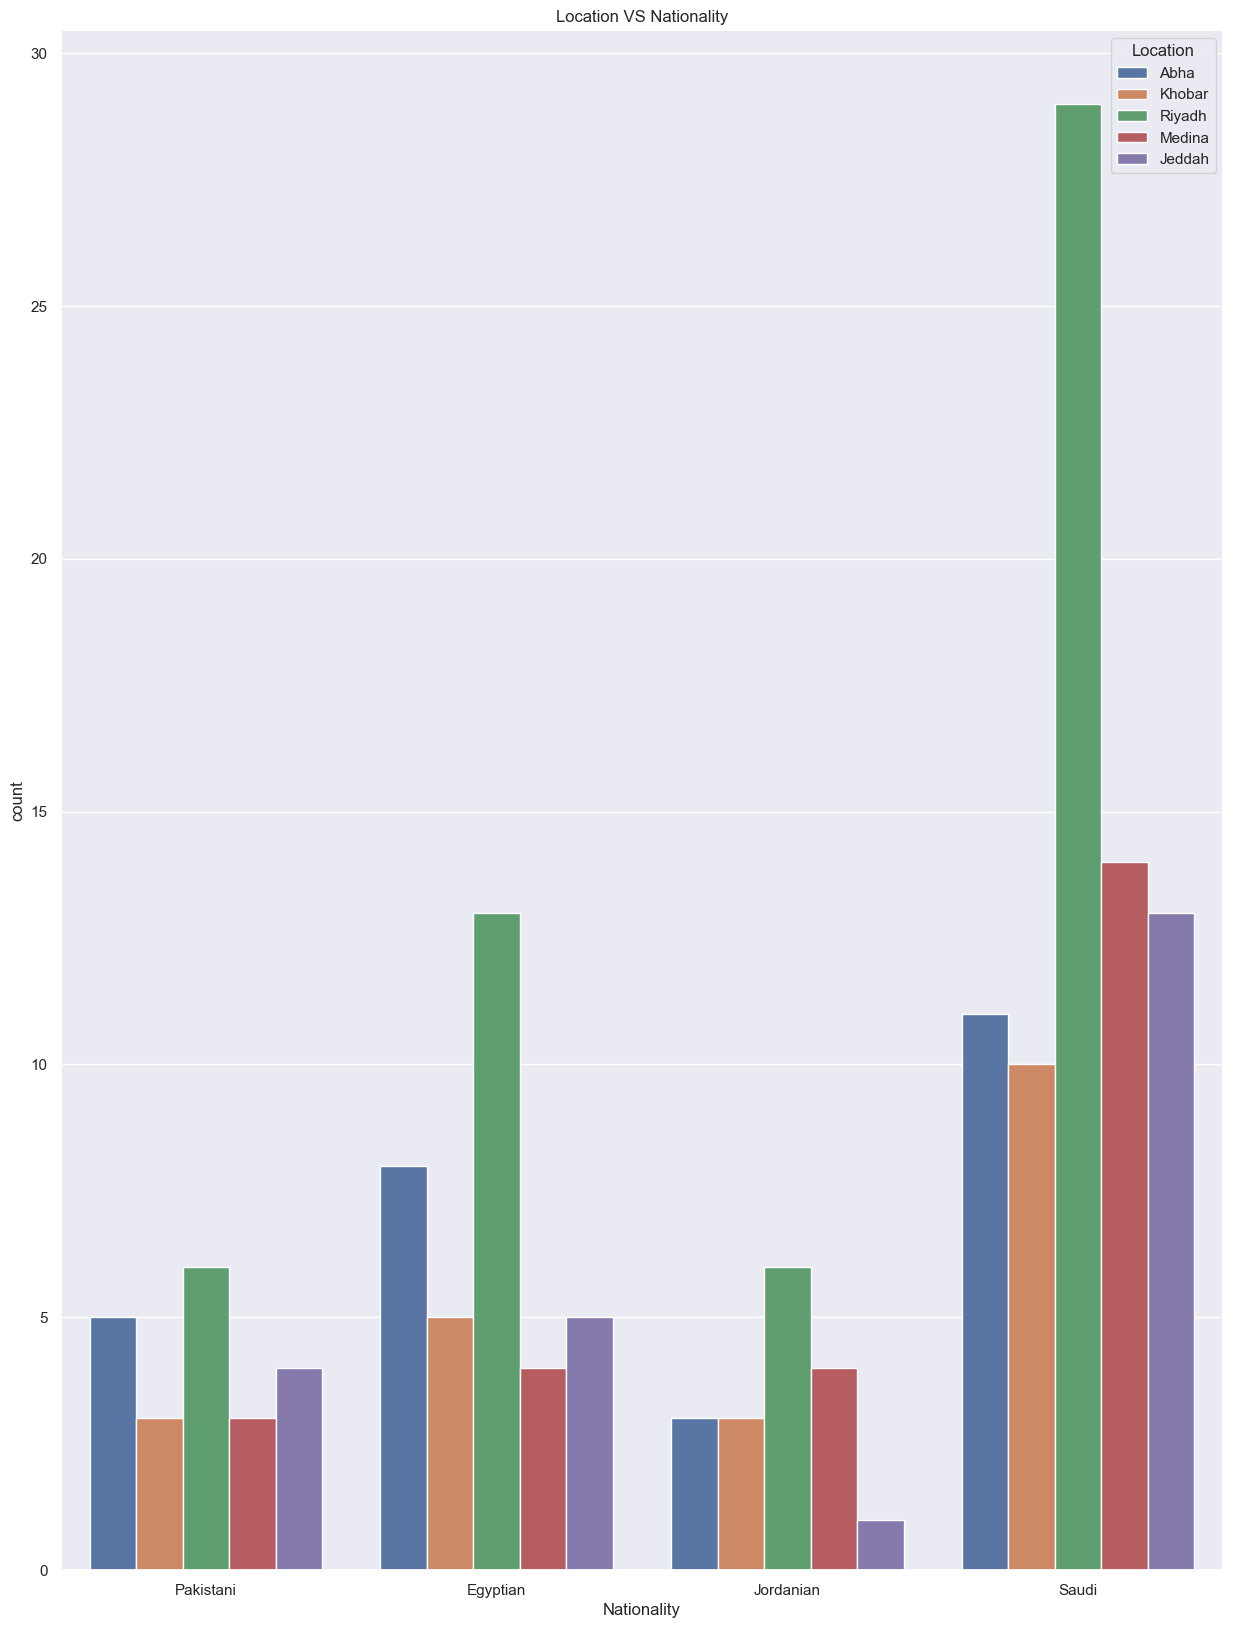

In [536]:
sns.countplot(x='Nationality',hue='Location',data=df_cd)
sns.set(rc={'figure.figsize':(15,20)})
plt.title("Location VS Nationality")

# observaions for above figures:

Egyption nationality have most high average salary, when it comes to area al khobar have lead when it comes with high average salary,most of customer with high salary take between 6 to 5 products.

Thing to notice that females tend to take high number of product compare males,and customers who takes product belong to group of year from 1970-1975.

Business Loan are the highest loan type.

Most of rejected loans belong to average 250k loan amount, and the highest type is business loan.

# Calculation of the total transaction amount per transaction type below:

In [547]:
df_ti1 = df_ti.groupby('Transaction_Type').sum()
print("Get sum of the grouped data:\n", df_ti1['Transaction_Amount'])

Get sum of the grouped data:
 Transaction_Type
Deposit       2447487.0
Transfer       460529.0
Withdrawal   -2441755.0
Name: Transaction_Amount, dtype: float64


# Loan Rejection Rate

In [578]:
loan_rejection_rate=df_lr1['CustomerID']['Rejected']/df_lr1['CustomerID'].sum()*100
print(loan_rejection_rate)

21.75925925925926


In [548]:
# Close the connection
c.close()

# Through EDA, we got useful insights, and below will give ida about our demographic and a few takeaways:
    
    Most of our pupaltion are female with average salary around 18k.
    Transfer are the lead transaction then withdrawal.
    Al khobar are have high average of number of product as well as high salary.  
    Customers prefer to take Personal loan and we can see show that personal loan has lowest rejection.